#**Autores:** Jhon Jairo Castillo - Juan Camilo Tobar


# **Descripción problematica y planteamiento de la solución**

Se pide generar un dataset propio de al menos 5 categorias que esté enfocada a HAR (Human Activity Recognition).

Según lo anterior se procedió a realizar el dataset en base a ejercicios de precalentamiento basicos, entre ellos se encuentra el Caminar, ejercicio de rotación de brazos, Saltar, Sentadilla y Trotar.

Para ello se tomaron 10 muestras por cada categoría, entre estás, se tomaron 8 de cada categoria para entrenamiento y 2 de cada categoria para validación, lo cual permite tener en entrenamiento 40 muestras y en validación 10 muestras. 

Teniendo los datos se procede a realizar tareas de preprocesamiento como carga de datos, escalamiento, normalización y generación de ventanas que permiten tener los datos de manera idonea para poder realizar los modelos necesarios, los cuales son modelos de redes recurrentes (LSTM) y redes convolocionales 1D.

Frente a ello se generan diversas graficas que permiten evidenciar a precisión y la disminución del error de los modelos y con ello identificar el mejor modelo.




## MODELO 1 (RED RECURRENTE LSTM)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Se cargan las diferentes dependencias necesarias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
# Load  dataset
RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Caminar1.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri1=Valores[7,2][0:-1]
Datos1=np.array(DatosOri1)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Caminar2.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri2=Valores[7,2][0:-1]
Datos2=np.array(DatosOri2)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Caminar3.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri3=Valores[7,2][0:-1]
Datos3=np.array(DatosOri3)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Caminar4.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri4=Valores[7,2][0:-1]
Datos4=np.array(DatosOri4)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Caminar5.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri5=Valores[7,2][0:-1]
Datos5=np.array(DatosOri5)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Caminar6.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri6=Valores[7,2][0:-1]
Datos6=np.array(DatosOri6)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Caminar7.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri7=Valores[7,2][0:-1]
Datos7=np.array(DatosOri7)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Caminar8.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri8=Valores[7,2][0:-1]
Datos8=np.array(DatosOri8)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Brazo1.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri9=Valores[7,2][0:-1]
Datos9=np.array(DatosOri9)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Brazo2.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri10=Valores[7,2][0:-1]
Datos10=np.array(DatosOri10)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Brazo3.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri11=Valores[7,2][0:-1]
Datos11=np.array(DatosOri11)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Brazo4.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri12=Valores[7,2][0:-1]
Datos12=np.array(DatosOri12)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Brazo5.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri13=Valores[7,2][0:-1]
Datos13=np.array(DatosOri13)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Brazo6.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri14=Valores[7,2][0:-1]
Datos14=np.array(DatosOri14)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Brazo7.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri15=Valores[7,2][0:-1]
Datos15=np.array(DatosOri15)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Brazo8.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri16=Valores[7,2][0:-1]
Datos16=np.array(DatosOri16)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Saltar1.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri17=Valores[7,2][0:-1]
Datos17=np.array(DatosOri17)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Saltar2.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri18=Valores[7,2][0:-1]
Datos18=np.array(DatosOri18)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Saltar3.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri19=Valores[7,2][0:-1]
Datos19=np.array(DatosOri19)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Saltar4.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri20=Valores[7,2][0:-1]
Datos20=np.array(DatosOri20)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Saltar5.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri21=Valores[7,2][0:-1]
Datos21=np.array(DatosOri21)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Saltar6.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri22=Valores[7,2][0:-1]
Datos22=np.array(DatosOri22)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Saltar7.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri23=Valores[7,2][0:-1]
Datos23=np.array(DatosOri23)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Saltar8.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri24=Valores[7,2][0:-1]
Datos24=np.array(DatosOri24)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Sentadilla1.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri25=Valores[7,2][0:-1]
Datos25=np.array(DatosOri25)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Sentadilla2.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri26=Valores[7,2][0:-1]
Datos26=np.array(DatosOri26)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Sentadilla3.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri27=Valores[7,2][0:-1]
Datos27=np.array(DatosOri27)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Sentadilla4.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri28=Valores[7,2][0:-1]
Datos28=np.array(DatosOri28)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Sentadilla5.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri29=Valores[7,2][0:-1]
Datos29=np.array(DatosOri29)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Sentadilla6.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri30=Valores[7,2][0:-1]
Datos30=np.array(DatosOri30)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Sentadilla7.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri31=Valores[7,2][0:-1]
Datos31=np.array(DatosOri31)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Sentadilla8.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri32=Valores[7,2][0:-1]
Datos32=np.array(DatosOri32)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Trotar1.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri33=Valores[7,2][0:-1]
Datos33=np.array(DatosOri33)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Trotar2.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri34=Valores[7,2][0:-1]
Datos34=np.array(DatosOri34)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Trotar3.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri35=Valores[7,2][0:-1]
Datos35=np.array(DatosOri35)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Trotar4.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri36=Valores[7,2][0:-1]
Datos36=np.array(DatosOri36)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Trotar5.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri37=Valores[7,2][0:-1]
Datos37=np.array(DatosOri37)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Trotar6.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri38=Valores[7,2][0:-1]
Datos38=np.array(DatosOri38)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Trotar7.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri39=Valores[7,2][0:-1]
Datos39=np.array(DatosOri39)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/training/Trotar8.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosOri40=Valores[7,2][0:-1]
Datos40=np.array(DatosOri40)

Datos=np.concatenate((Datos1,Datos2,Datos3,Datos4,Datos5,Datos6,Datos7,Datos8,Datos9,Datos10,Datos11,Datos13,Datos14,Datos15,Datos16,
                      Datos17,Datos18,Datos19,Datos20,Datos21,Datos22,Datos23,Datos24,Datos25,Datos26,Datos27,Datos28,Datos29,Datos30,
                      Datos31,Datos32,Datos33,Datos34,Datos35,Datos36,Datos37,Datos38,Datos39,Datos40), axis=0)

print(Datos.shape)


(12859, 3)


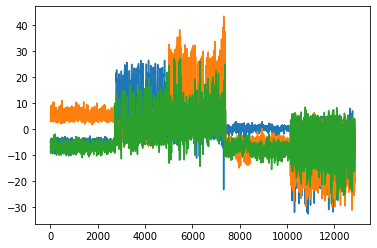

In [ ]:
plt.plot(Datos)

In [ ]:
#Escalamiento
scaler1 = StandardScaler()
scaler1.fit(Datos)
DatosN1=scaler1.transform(Datos)

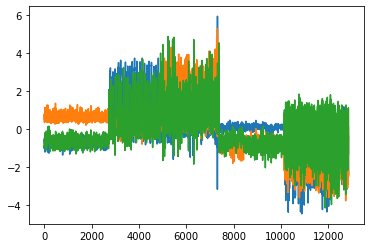

In [ ]:
plt.plot(DatosN1)

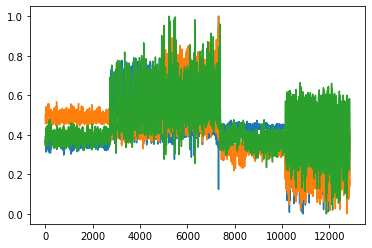

In [ ]:
#Normalización
scaler2 = MinMaxScaler()
scaler2.fit(Datos)
DatosN=scaler2.transform(Datos)
plt.plot(DatosN)

In [ ]:
#Generación de ventanas 
Xtrain=np.zeros((167,77,3))

for i in range(167):
    Xtrain[i,:,0]=DatosN[i*77:(i+1)*77,0].T
    Xtrain[i,:,1]=DatosN[i*77:(i+1)*77,1].T
    Xtrain[i,:,2]=DatosN[i*77:(i+1)*77,2].T

print(Xtrain.shape)


(167, 77, 3)


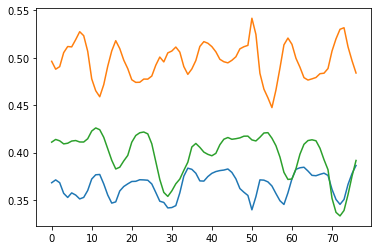

In [ ]:
plt.plot(Xtrain[5,:,:])

In [ ]:
#Generación Ytrain
YtrainIni=np.zeros((167,1))
for i in range(33):
    YtrainIni[i]=0

for i in range(33,66):
    YtrainIni[i]=1

for i in range(66,99):
    YtrainIni[i]=2  

for i in range(99,132):
    YtrainIni[i]=3

for i in range(132,167):
    YtrainIni[i]=4       

print(YtrainIni)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.

In [ ]:
#OneHotEncoding
Ytrain= to_categorical(YtrainIni)
print(Ytrain)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 77, 10)            560       
                                                                 
 lstm_1 (LSTM)               (None, 77, 15)            1560      
                                                                 
 lstm_2 (LSTM)               (None, 77, 20)            2880      
                                                                 
 lstm_3 (LSTM)               (None, 5)                 520       
                                                                 
Total params: 5,520
Trainable params: 5,520
Non-trainable params: 0
_________________________________________________________________


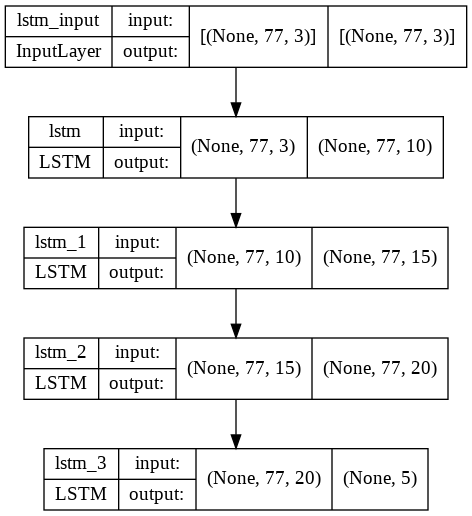

In [ ]:
#Incluir más capas no mejora la precisión de la red, en algunos casos empeora. 

from keras.layers.recurrent_v2 import LSTM

#Definición del modelo
modelo = keras.models.Sequential([
    keras.layers.LSTM(10, return_sequences=True, input_shape=[77,3]),
    keras.layers.LSTM(15, return_sequences=True),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.LSTM(5)
                                                   
                                   ])

modelo.summary()

keras.utils.plot_model(modelo, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [ ]:
modelo.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
history = modelo.fit(Xtrain,Ytrain, epochs=100,batch_size=None)


Epoch 1/100
6/6 [==============================] - 6s 79ms/step - loss: 0.1921 - accuracy: 0.2096
Epoch 2/100
6/6 [==============================] - 0s 75ms/step - loss: 0.1713 - accuracy: 0.2096
Epoch 3/100
6/6 [==============================] - 0s 78ms/step - loss: 0.1669 - accuracy: 0.1976
Epoch 4/100
6/6 [==============================] - 0s 75ms/step - loss: 0.1627 - accuracy: 0.1976
Epoch 5/100
6/6 [==============================] - 0s 75ms/step - loss: 0.1600 - accuracy: 0.2096
Epoch 6/100
6/6 [==============================] - 0s 75ms/step - loss: 0.1591 - accuracy: 0.2335
Epoch 7/100
6/6 [==============================] - 0s 79ms/step - loss: 0.1583 - accuracy: 0.2934
Epoch 8/100
6/6 [==============================] - 0s 78ms/step - loss: 0.1576 - accuracy: 0.3772
Epoch 9/100
6/6 [==============================] - 0s 73ms/step - loss: 0.1565 - accuracy: 0.4132
Epoch 10/100
6/6 [==============================] - 0s 74ms/step - loss: 0.1552 - accuracy: 0.4132
Epoch 11/100
6/6 [=

6/6 [==============================] - 2s 15ms/step - loss: 0.0164 - accuracy: 0.9581


[0.016399234533309937, 0.9580838084220886]

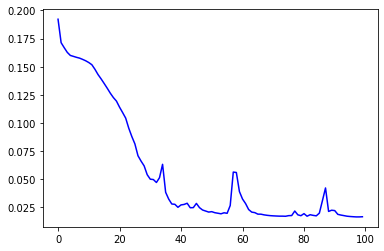

In [ ]:
plt.plot(history.history["loss"],'b')
modelo.evaluate(Xtrain, Ytrain)

(3292, 3)


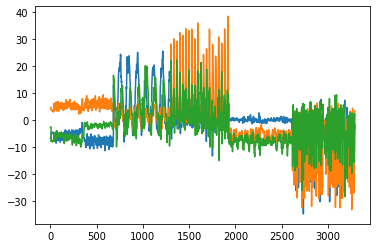

In [ ]:
# Load  dataset validation
RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/validation/Caminar9.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosValOri1=Valores[7,2][0:-1]
DatosVal1=np.array(DatosValOri1)


RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/validation/Caminar10.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosValOri2=Valores[7,2][0:-1]
DatosVal2=np.array(DatosValOri2)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/validation/Brazo9.json"
#dataframe = pd.read_json(RutaFile, header=None)
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosValOri3=Valores[7,2][0:-1]
DatosVal3=np.array(DatosValOri3)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/validation/Brazo10.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosValOri4=Valores[7,2][0:-1]
DatosVal4=np.array(DatosValOri4)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/validation/Saltar9.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosValOri5=Valores[7,2][0:-1]
DatosVal5=np.array(DatosValOri5)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/validation/Saltar10.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosValOri6=Valores[7,2][0:-1]
DatosVal6=np.array(DatosValOri6)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/validation/Sentadilla9.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosValOri7=Valores[7,2][0:-1]
DatosVal7=np.array(DatosValOri7)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/validation/Sentadilla10.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosValOri8=Valores[7,2][0:-1]
DatosVal8=np.array(DatosValOri8)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/validation/Trotar9.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosValOri9=Valores[7,2][0:-1]
DatosVal9=np.array(DatosValOri9)

RutaFile="/content/gdrive/MyDrive/DatosSecuenciales/HAR/validation/Trotar10.json"
dataframe = pd.read_json(RutaFile)
Valores = dataframe.iloc[:,:].values
DatosValOri10=Valores[7,2][0:-1]
DatosVal10=np.array(DatosValOri10)

DatosVal=np.concatenate((DatosVal1,DatosVal2,DatosVal3,DatosVal4,DatosVal5,DatosVal6,DatosVal7,DatosVal8,DatosVal9,DatosVal10), axis=0)
print(DatosVal.shape)

plt.plot(DatosVal)

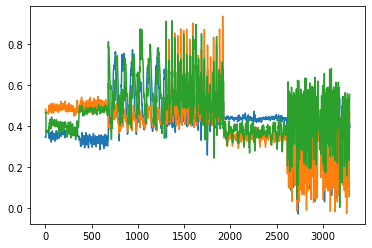

In [ ]:
scaler3 = MinMaxScaler()
scaler3.fit(DatosVal)
DatosValN=scaler2.transform(DatosVal)
plt.plot(DatosValN)

In [ ]:
XVal=np.zeros((42,77,3))

for i in range(42):
    XVal[i,:,0]=DatosValN[i*77:(i+1)*77,0].T
    XVal[i,:,1]=DatosValN[i*77:(i+1)*77,1].T
    XVal[i,:,2]=DatosValN[i*77:(i+1)*77,2].T

print(XVal.shape)


(42, 77, 3)


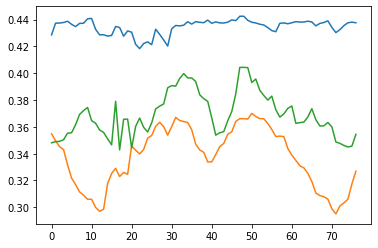

In [ ]:
plt.plot(XVal[30,:,:])

In [ ]:
YValIni=np.zeros((42,1))
for i in range(8):
    YValIni[i]=0

for i in range(8,16):
    YValIni[i]=1

for i in range(16,24):
    YValIni[i]=2  

for i in range(24,32):
    YValIni[i]=3

for i in range(32,42):
    YValIni[i]=4       

print(YValIni)
YVal= to_categorical(YValIni)

print(YVal)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]]
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0

In [ ]:
modelo.evaluate(XVal, YVal)

2/2 [==============================] - 0s 16ms/step - loss: 0.0465 - accuracy: 0.8810


[0.0464901477098465, 0.8809523582458496]

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.88      0.88      0.88         8
           2       0.88      0.88      0.88         8
           3       0.78      0.88      0.82         8
           4       1.00      0.80      0.89        10

    accuracy                           0.88        42
   macro avg       0.88      0.89      0.88        42
weighted avg       0.89      0.88      0.88        42

[[8 0 0 0 0]
 [1 7 0 0 0]
 [0 1 7 0 0]
 [0 0 1 7 0]
 [0 0 0 2 8]]


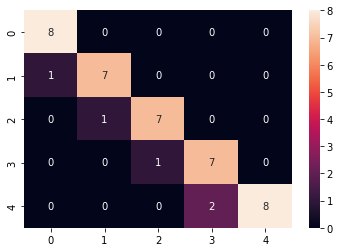

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

ypredic=modelo.predict(XVal)

y_test_class = np.argmax(YVal,axis=1) 
y_pred_class = np.argmax(ypredic,axis=1) 

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

# **Resultados**

El modelo generado con redes LSTM funcionan de manera satisfactoria tanto en entrenamiento como en validación. Es importante tener en cuenta que según la cantidad de datos obtenidos en las muestras no fue posible generar ventanas que coincidan exactamente con la cantidad de datos.

Por lo anterior, se puede inferir que algunas predicciones fallidas se pueden dar por un desfase entre clases al generar las ventanas, por lo que eliminando alguna muestras o agregando otras se podría obtener una precisión del 100% tanto en entrenamiento como en validación. 

## Modelo 2 (Convolucion 1D)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 77, 16)            160       
                                                                 
 conv1d_7 (Conv1D)           (None, 77, 32)            1568      
                                                                 
 conv1d_8 (Conv1D)           (None, 77, 64)            6208      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 39, 64)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2496)              0         
                                                                 
 dense_2 (Dense)             (None, 5)                 12485     
                                                      

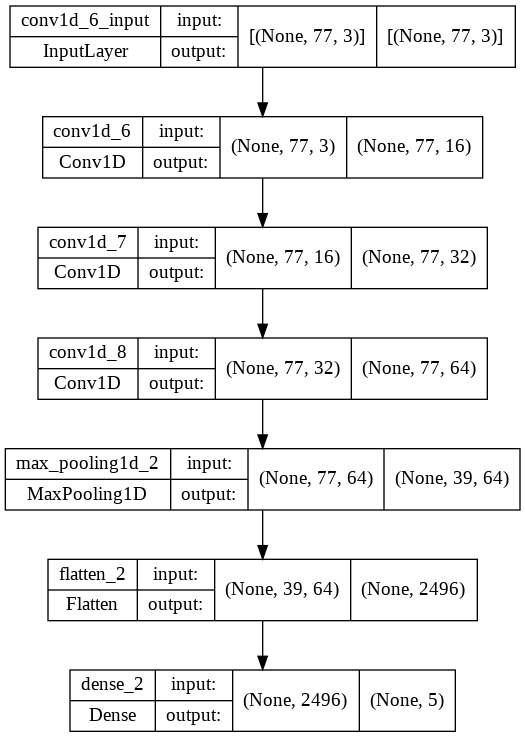

In [ ]:
#Definición del modelo
modelo2 = Sequential()
modelo2.add(Conv1D(16, 3, activation="relu",padding="same",input_shape=(77,3)))
modelo2.add(Conv1D(32, 3, activation="relu",padding="same"))
modelo2.add(Conv1D(64, 3, activation="relu",padding="same"))
modelo2.add(MaxPooling1D(pool_size=2,strides=2, padding='same'))
modelo2.add(Flatten())
modelo2.add(Dense(5, activation = 'softmax'))

modelo2.summary()

keras.utils.plot_model(modelo2, to_file='model_plot4.png', show_shapes=True, show_layer_names=True)

In [ ]:
modelo2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = modelo2.fit(Xtrain,Ytrain, epochs=200,batch_size=None)

Epoch 1/200
6/6 [==============================] - 1s 10ms/step - loss: 0.1877 - accuracy: 0.9521
Epoch 2/200
6/6 [==============================] - 0s 9ms/step - loss: 0.1751 - accuracy: 0.9461
Epoch 3/200
6/6 [==============================] - 0s 9ms/step - loss: 0.1343 - accuracy: 0.9581
Epoch 4/200
6/6 [==============================] - 0s 8ms/step - loss: 0.1230 - accuracy: 0.9701
Epoch 5/200
6/6 [==============================] - 0s 9ms/step - loss: 0.1246 - accuracy: 0.9641
Epoch 6/200
6/6 [==============================] - 0s 8ms/step - loss: 0.1298 - accuracy: 0.9701
Epoch 7/200
6/6 [==============================] - 0s 9ms/step - loss: 0.1094 - accuracy: 0.9701
Epoch 8/200
6/6 [==============================] - 0s 8ms/step - loss: 0.1159 - accuracy: 0.9701
Epoch 9/200
6/6 [==============================] - 0s 8ms/step - loss: 0.1103 - accuracy: 0.9641
Epoch 10/200
6/6 [==============================] - 0s 9ms/step - loss: 0.1094 - accuracy: 0.9701
Epoch 11/200
6/6 [==========

6/6 [==============================] - 0s 5ms/step - loss: 0.0183 - accuracy: 0.9940


[0.018302351236343384, 0.9940119981765747]

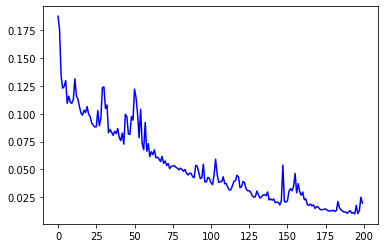

In [ ]:
plt.plot(history2.history["loss"],'b')
modelo2.evaluate(Xtrain, Ytrain)

In [ ]:
modelo2.evaluate(XVal, YVal)

2/2 [==============================] - 0s 7ms/step - loss: 2.3720 - accuracy: 0.7143


[2.3720219135284424, 0.7142857313156128]

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.71      0.62      0.67         8
           2       0.54      0.88      0.67         8
           3       0.64      0.88      0.74         8
           4       1.00      0.60      0.75        10

    accuracy                           0.71        42
   macro avg       0.78      0.72      0.72        42
weighted avg       0.79      0.71      0.72        42

[[5 0 3 0 0]
 [0 5 3 0 0]
 [0 1 7 0 0]
 [0 1 0 7 0]
 [0 0 0 4 6]]


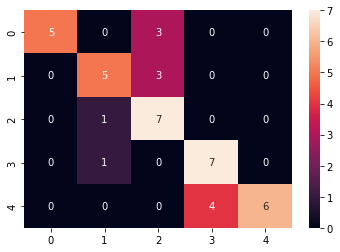

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

ypredic=modelo2.predict(XVal)

y_test_class = np.argmax(YVal,axis=1) 
y_pred_class = np.argmax(ypredic,axis=1) 

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

# **Resultados**

Se observa que el rendimiento de las redes convolucionales 1D se logran generar y entrenar de manera muy rapida, pese a ello la precisión se ve disminuida en los datos de validación.

Según se observa en las metricas en cuanto a las muestras de validación la precisión se ve claramente disminuida con respecto a los datos de entrenamiento, que aunque no fueron perfectos se vió con un porcentaje del 99% mientras que en validación se encuentra un aproximado del 75%. Se realizaron varias arquitecturas para el modelo pero en gran parte de ellas ocurria lo mismo, por lo que se puede pensar en un sobreentrenamiento o implementar algunas capas adicionales de maxpooling o dropout para encontrar una mejora.

## **Conclusiones**

- Las redes recurrentes presentan mejores resultados frente a tareas de procesamiento de datos secuenciales temporales.

- Pese a tener un aumento en el tiempo de entrenamiento, los modelos de redes recurrentes presentan mejores resultados para esta tarea en particular, logrando identificar de mejor manera los patrones presentandos, esto gracias a la arquitectura que poseen las unidades LSTM que permiten recordar e identificar patrones importantes. 

- Las redes convolucionales sse utilizan de mejor manera para tareas relacionados con datos espaciales, como lo son imagenes.

# **Calculo de parametros**


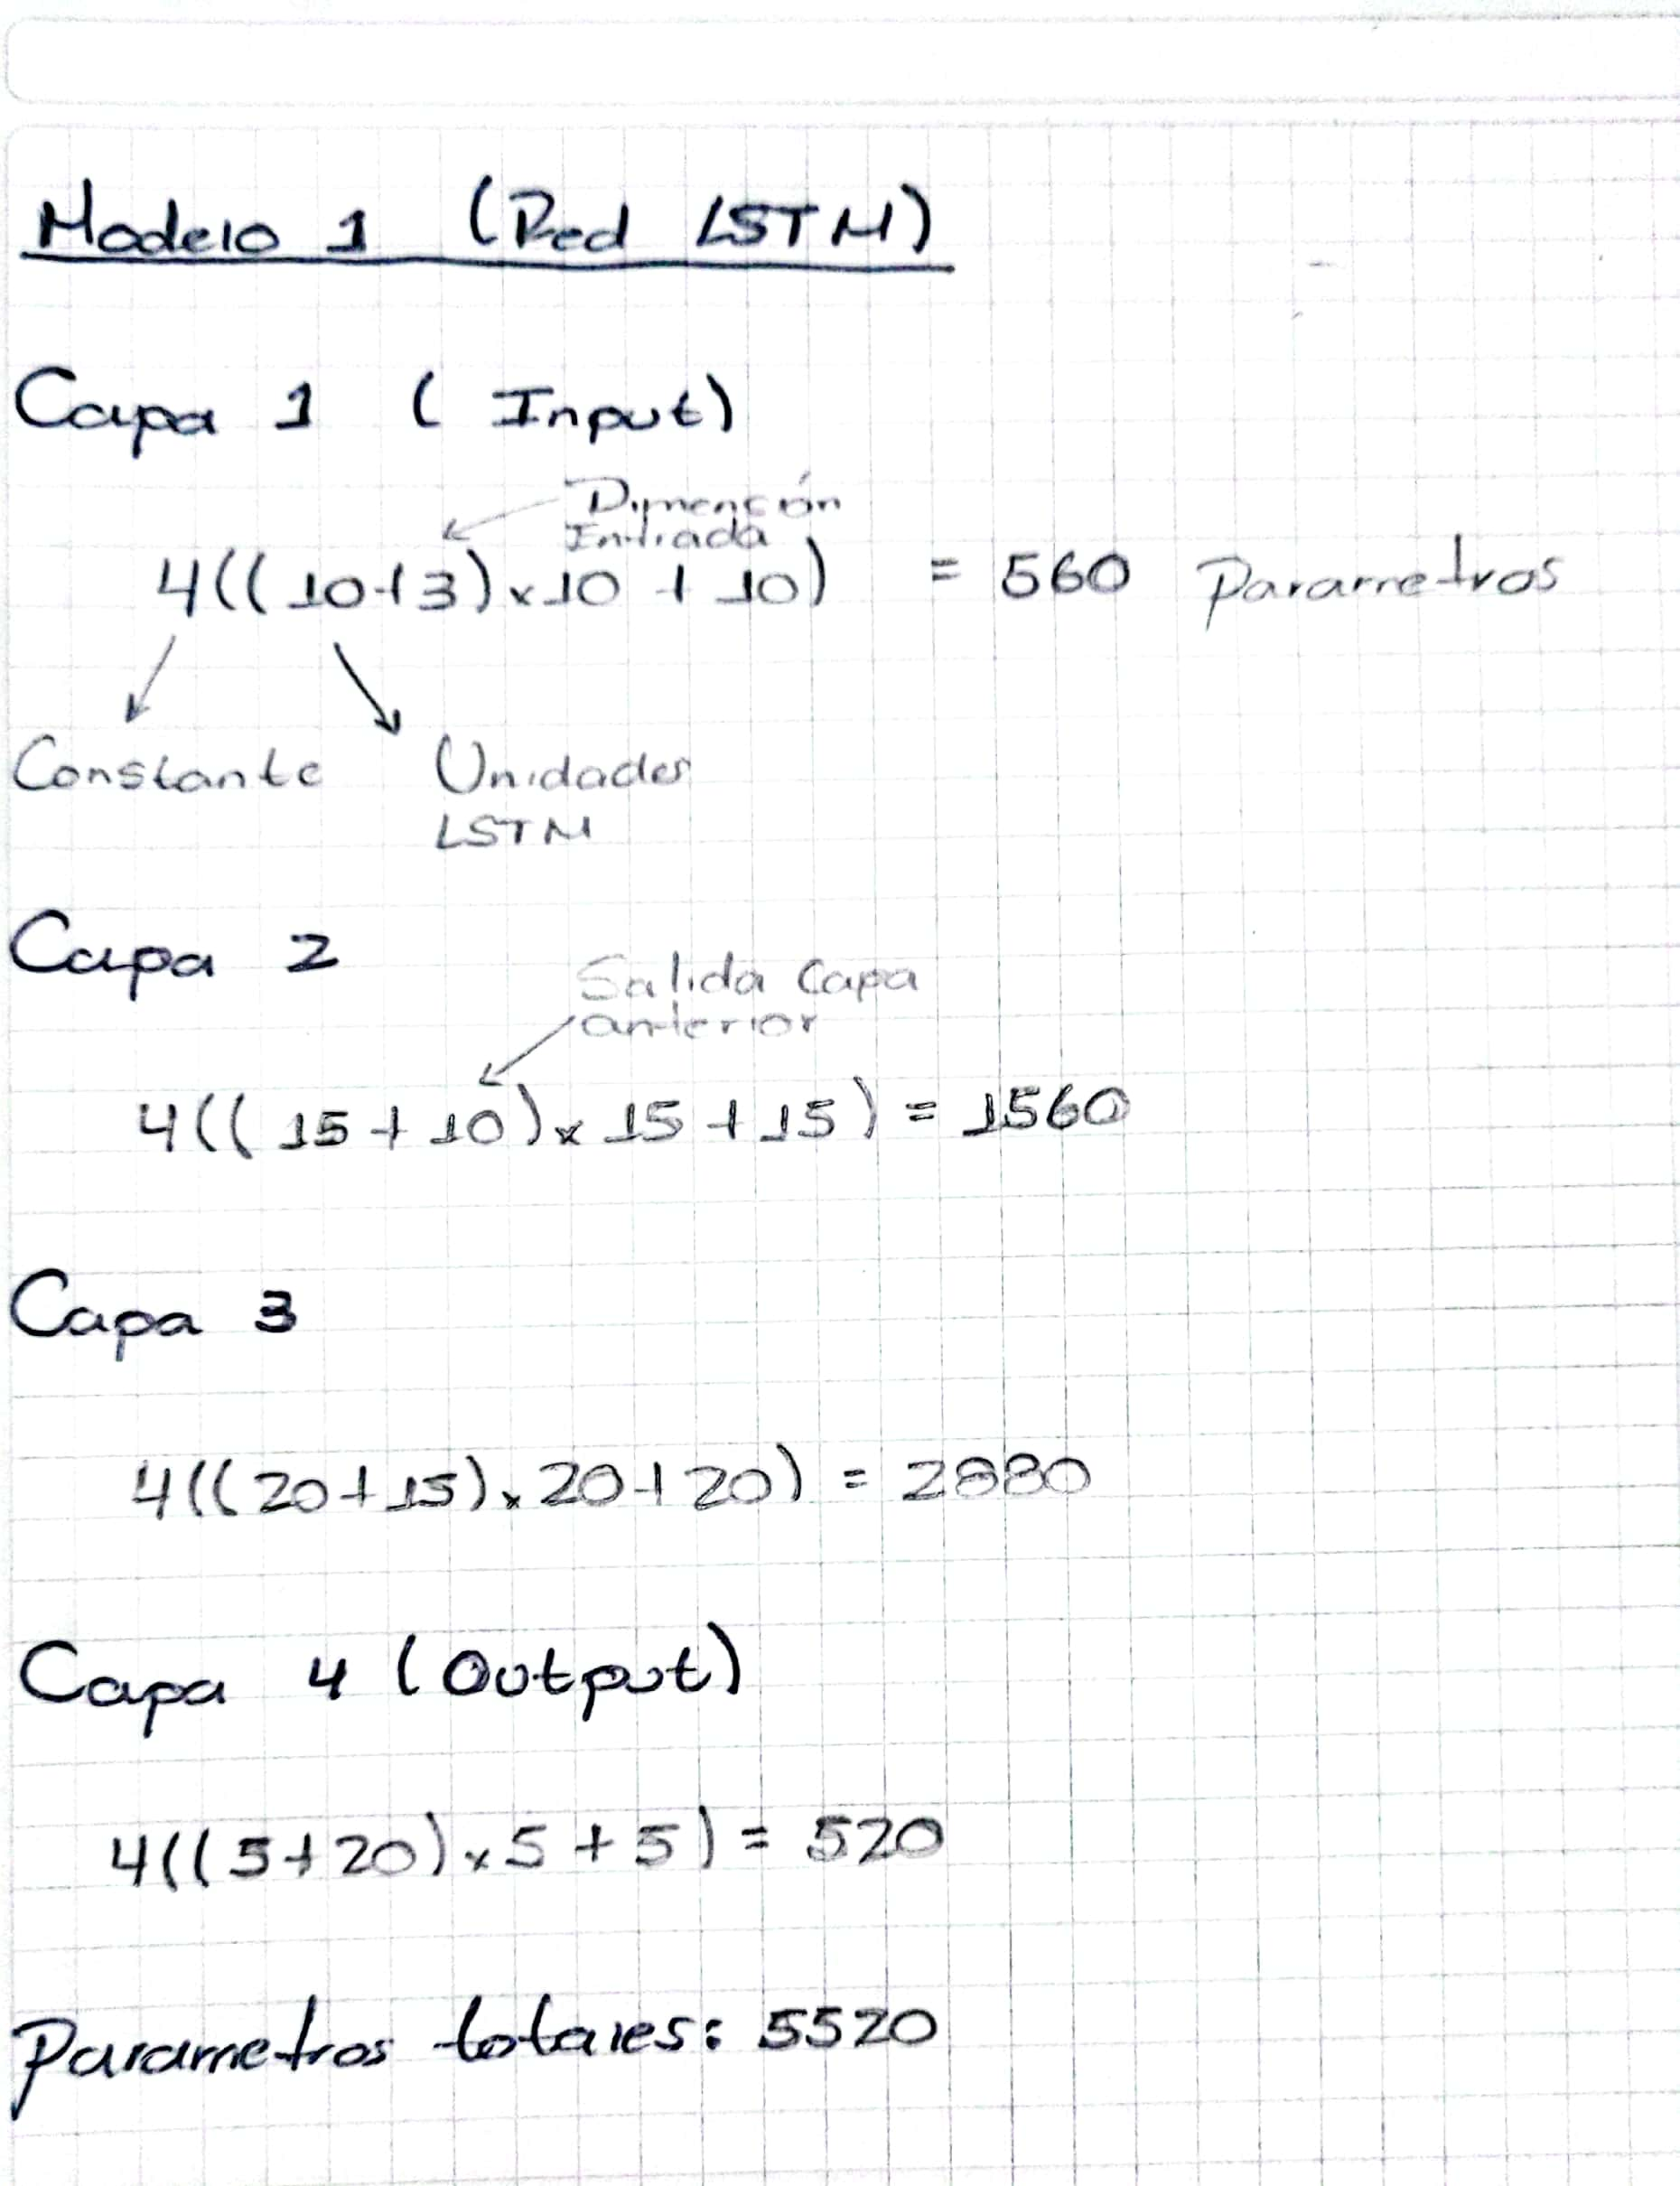

# **Calculo de parametros**

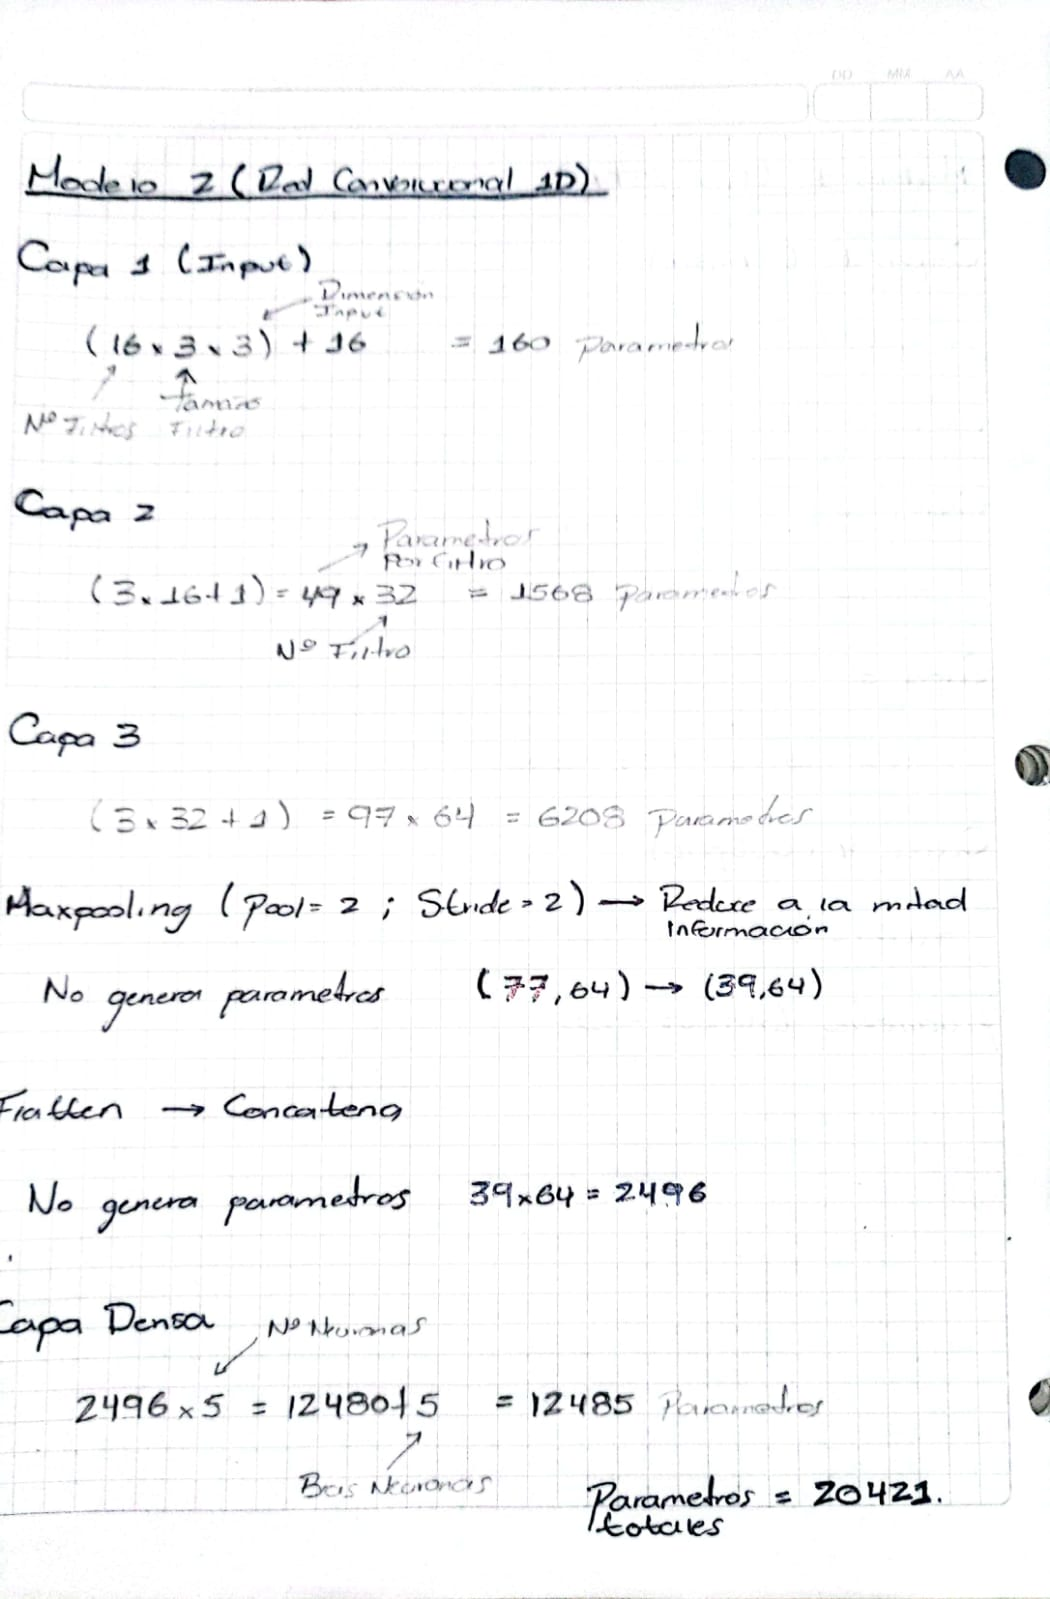